<a href="https://colab.research.google.com/github/navyadua/ecommerce-customer-segmentation/blob/main/Ecommerce_RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## E-Commerce Analytics: Customer Segmentation Using RFM Analysis

### Project Description

#### Abstract
This project aims to analyze and segment the customers of an e-commerce company using the Recency, Frequency, and Monetary (RFM) approach. The goal is to enable the company to optimize their retention and acquisition strategies by understanding customer behavior more effectively.

#### Market Outlook
Successful e-commerce companies have excelled in targeting the desired customers by leveraging customer segmentation. Unlike mass marketing, which can be costly and inefficient, customer segmentation allows for tailored marketing strategies based on various factors, leading to better resource allocation and improved marketing efforts. Common segmentation characteristics include:
- **Geographic**: Country, state, and city.
- **Demographic**: Gender, age, income, education level, etc.
- **Psychographic and Behavior**: Geography, lifestyle, age, religious beliefs, personality traits, attitudes, interests, and lifestyles.

#### Problem Overview
The e-commerce company has provided a dataset containing transaction data from 2016 to 2017. The dataset includes date-time of sale, customer shipping location, and price per unit. The objective is to derive meaningful insights from this two-year data period, focusing on monetary value and purchase frequency.

#### Objective
Build an unsupervised learning model to analyze the company's customers using the RFM approach.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the data
data = pd.read_csv('/content/E-com_Data.csv')
rows, cols = data.shape
print(f'The data has {rows} rows and {cols} columns.')

The data has 47295 rows and 12 columns.


In [ ]:
# Number of features
cat_feat = []
num_feat = []
for attribute in data.columns:
    if data[attribute].dtype == 'O':
        cat_feat.append(attribute)
    else:
        num_feat.append(attribute)

print(f'We have {len(cat_feat)} categorical and {len(num_feat)} numerical features.')

We have 5 categorical and 7 numerical features.


In [ ]:
# Percentage of missing value.
np.round(data.isnull().mean()*100, 2)

CustomerID            17.00
Item Code              0.00
InvoieNo               0.00
Date of purchase       0.00
Quantity               0.00
Time                   0.00
price per Unit         0.00
Price                  0.00
Shipping Location      0.00
Cancelled_status      98.14
Reason of return     100.00
Sold as set          100.00
dtype: float64

In [ ]:
data.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [ ]:
data_to_drop = ['Item Code', 'Quantity', 'Time', 'price per Unit', 'Shipping Location',
                'Cancelled_status', 'Reason of return', 'Sold as set']

data = data.drop(data_to_drop, axis=1)
data.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177,29-10-2017,1926.0
1,4352.0,394422,05-10-2017,1740.0
2,4352.0,394422,12-10-2017,1866.0
3,4352.0,388633,22-08-2017,1869.0
4,4352.0,394422,10-10-2017,1888.0


In [ ]:
data = data.rename(columns={'InvoieNo' : 'InvoiceNo', 'Date of purchase': 'Date' })
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177,29-10-2017,1926.0
1,4352.0,394422,05-10-2017,1740.0
2,4352.0,394422,12-10-2017,1866.0
3,4352.0,388633,22-08-2017,1869.0
4,4352.0,394422,10-10-2017,1888.0


In [ ]:
print('Number of duplicates before treating:', data.duplicated().sum())
data = data.drop_duplicates(ignore_index=True)
print('Number of duplicates after treating:', data.duplicated().sum())

Number of duplicates before treating: 50
Number of duplicates after treating: 0


In [ ]:
# Missing values
data.isna().sum()

CustomerID    8036
InvoiceNo        0
Date             0
Price            1
dtype: int64

In [ ]:
# Removing missing values in customer id
data = data.dropna(subset=['CustomerID'])
data.isna().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39209 entries, 0 to 47244
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  39209 non-null  float64
 1   InvoiceNo   39209 non-null  int64  
 2   Date        39209 non-null  object 
 3   Price       39208 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39209 entries, 0 to 47244
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CustomerID  39209 non-null  float64       
 1   InvoiceNo   39209 non-null  int64         
 2   Date        39209 non-null  datetime64[ns]
 3   Price       39208 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.5 MB


In [ ]:
data.describe()

,CustomerID,InvoiceNo,Date,Price
count,39209.000000,39209.000000,39209,39208.000000
mean,2777.053381,385085.976102,2017-07-10 13:02:44.809100032,2724.773541
min,2.000000,361434.000000,2016-12-02 00:00:00,-10152.000000
25%,1461.000000,372955.000000,2017-04-02 00:00:00,522.000000
50%,3195.000000,386158.000000,2017-07-30 00:00:00,1617.000000
75%,4243.000000,396810.000000,2017-10-24 00:00:00,2592.000000
max,4372.000000,406651.000000,2017-12-19 00:00:00,89400.000000
std,1479.621433,13312.954271,NaN,6192.392894


In [ ]:
data['Date'].describe()

count                            39209
mean     2017-07-10 13:02:44.809100032
min                2016-12-02 00:00:00
25%                2017-04-02 00:00:00
50%                2017-07-30 00:00:00
75%                2017-10-24 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

In [ ]:
latest_date = dt.datetime(2017, 12, 20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [ ]:
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177,2017-10-29,1926.0
1,4352.0,394422,2017-10-05,1740.0
2,4352.0,394422,2017-10-12,1866.0
3,4352.0,388633,2017-08-22,1869.0
4,4352.0,394422,2017-10-10,1888.0


In [ ]:
RFMScore = data.groupby('CustomerID').agg({'Date': lambda x: (latest_date - x.max()).days,
                                           'InvoiceNo': lambda x : x.count(),
                                           'Price': lambda x: x.sum()})

RFMScore.rename(columns = {'Date': 'Recency', 'InvoiceNo': 'Frequency', 'Price': 'Monetory'}, inplace=True)
RFMScore.head()

,Recency,Frequency,Monetory
CustomerID,,,
2.0,9,33,93730.0
3.0,328,3,38448.0
4.0,19,8,18051.0
6.0,73,5,7596.0
8.0,233,6,13980.0


In [ ]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,9,33,93730.0
1,3.0,328,3,38448.0
2,4.0,19,8,18051.0
3,6.0,73,5,7596.0
4,8.0,233,6,13980.0
...,...,...,...,...
3228,4368.0,278,10,20480.0
3229,4369.0,181,7,10774.0
3230,4370.0,9,13,24962.0
3231,4371.0,4,751,279720.0


In [ ]:
for attribute in RFMScore:
    print(f'For {attribute} the min value is {RFMScore[attribute].min()} and max value is {RFMScore[attribute].max()}')

For Recency the min value is 1 and max value is 382
For Frequency the min value is 1 and max value is 1271
For Monetory the min value is -14052.0 and max value is 10654918.0


In [ ]:
RFMScore.describe()

,Recency,Frequency,Monetory
count,3233.000000,3233.000000,3.233000e+03
mean,101.230127,12.127745,3.304452e+04
std,102.084040,39.371934,2.239396e+05
min,1.000000,1.000000,-1.405200e+04
25%,24.000000,2.000000,2.756000e+03
50%,60.000000,4.000000,7.158000e+03
75%,152.000000,10.000000,1.917000e+04
max,382.000000,1271.000000,1.065492e+07


In [ ]:
quantile = RFMScore.quantile(q=[0.25, 0.5, 0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 24.0, 0.5: 60.0, 0.75: 152.0},
 'Frequency': {0.25: 2.0, 0.5: 4.0, 0.75: 10.0},
 'Monetory': {0.25: 2756.0, 0.5: 7158.0, 0.75: 19170.0}}

In [ ]:
def recency_score(x, p, d):
    # x - condition, p - percentile/quantile, d - data point
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnM_Score(x, p, d):
    # x - condition, p - percentile/quantile, d - data point
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
RFMScore['R'] = RFMScore["Recency"].apply(recency_score, args=('Recency', quantile, ))
RFMScore['F'] = RFMScore["Frequency"].apply(FnM_Score, args=('Frequency', quantile, ))
RFMScore['M'] = RFMScore["Monetory"].apply(FnM_Score, args=('Monetory', quantile, ))

In [ ]:
RFMScore.reset_index(inplace=True)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,9,33,93730.0,1,1,1
1,3.0,328,3,38448.0,4,3,1
2,4.0,19,8,18051.0,1,2,2
3,6.0,73,5,7596.0,3,2,2
4,8.0,233,6,13980.0,4,2,2


In [ ]:
RFMScore['RFM'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)
RFMScore['RFM_Score'] = RFMScore[['R', 'F', 'M']].sum(axis=1)
RFMScore.reset_index(inplace=True)
RFMScore.head()

,index,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score
0,0,2.0,9,33,93730.0,1,1,1,111,3
1,1,3.0,328,3,38448.0,4,3,1,431,8
2,2,4.0,19,8,18051.0,1,2,2,122,5
3,3,6.0,73,5,7596.0,3,2,2,322,7
4,4,8.0,233,6,13980.0,4,2,2,422,8


In [ ]:
Loyal_customer = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cuts = pd.qcut(RFMScore.RFM_Score, 4, labels=Loyal_customer)
RFMScore['Loyality'] = score_cuts.values
RFMScore.reset_index(inplace=True)
del RFMScore['index']
RFMScore.head()

,level_0,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyality
0,0,2.0,9,33,93730.0,1,1,1,111,3,Platinum
1,1,3.0,328,3,38448.0,4,3,1,431,8,Gold
2,2,4.0,19,8,18051.0,1,2,2,122,5,Platinum
3,3,6.0,73,5,7596.0,3,2,2,322,7,Gold
4,4,8.0,233,6,13980.0,4,2,2,422,8,Gold


In [ ]:
RFMScore.to_csv('Segmentation_analysis.csv')

In [ ]:
RFMScore['Loyality'].value_counts()

Loyality
Gold        1001
Platinum     864
Silver       766
Bronze       602
Name: count, dtype: int64

In [ ]:
# Visualisation

In [ ]:
RFMScore.head()

,level_0,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyality
0,0,2.0,9,33,93730.0,1,1,1,111,3,Platinum
1,1,3.0,328,3,38448.0,4,3,1,431,8,Gold
2,2,4.0,19,8,18051.0,1,2,2,122,5,Platinum
3,3,6.0,73,5,7596.0,3,2,2,322,7,Gold
4,4,8.0,233,6,13980.0,4,2,2,422,8,Gold


In [ ]:
new_data = RFMScore.groupby('Loyality')[['Recency', 'Frequency', 'Monetory', 'CustomerID']].agg({
                    'Recency': 'sum', 'Frequency': 'sum', 'Monetory': 'sum', 'CustomerID': 'nunique'})
new_data = new_data.rename(columns={'CustomerID': 'No_of_customers'})
new_data.reset_index(inplace=True)

In [ ]:
new_data.head()

,Loyality,Recency,Frequency,Monetory,No_of_customers
0,Platinum,23989,29473,87027844.0,864
1,Gold,82275,6972,14954926.0,1001
2,Silver,86858,1888,3657055.0,766
3,Bronze,134155,876,1193096.0,602


In [ ]:
new_data['Percentage'] = round(new_data['No_of_customers']/len(RFMScore)*100, 2)
new_data

,Loyality,Recency,Frequency,Monetory,No_of_customers,Percentage
0,Platinum,23989,29473,87027844.0,864,26.72
1,Gold,82275,6972,14954926.0,1001,30.96
2,Silver,86858,1888,3657055.0,766,23.69
3,Bronze,134155,876,1193096.0,602,18.62


In [ ]:
vis_data = new_data.drop(['Recency', 'Frequency', 'Monetory'], axis=1)
vis_data.head()

,Loyality,No_of_customers,Percentage
0,Platinum,864,26.72
1,Gold,1001,30.96
2,Silver,766,23.69
3,Bronze,602,18.62


In [ ]:
!pip install squarify

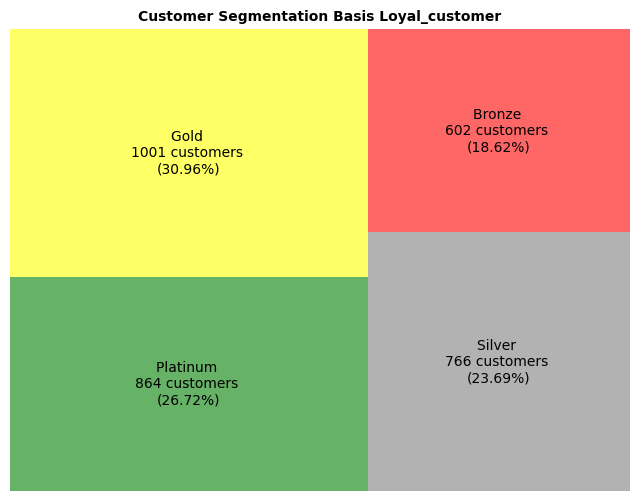

In [ ]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(8,6)
colors_dics = {'Platinum':'green', 'Gold':"yellow",'Silver':'gray','Bronze':'red'}

squarify.plot(sizes=vis_data['No_of_customers'],color=colors_dics.values(),
             label = ['{} \n{:.0f} customers \n({}%)'.format(*vis_data.iloc[i])
                      for i in range(0, len(vis_data))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyal_customer", fontsize=10, fontweight='bold')
plt.axis("off")
plt.show()

In [ ]:
# Building unsupervised model

In [ ]:
unsupervised_data = RFMScore.iloc[:, 1:4]
unsupervised_data.head()

,CustomerID,Recency,Frequency
0,2.0,9,33
1,3.0,328,3
2,4.0,19,8
3,6.0,73,5
4,8.0,233,6


In [ ]:
# Mandatory preprocessing - Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
unsupervised_data_sc = sc.fit_transform(unsupervised_data)
unsupervised_data_sc

array([[-1.69938116, -0.9036123 ,  0.53021229],
       [-1.6986075 ,  2.22174742, -0.23186966],
       [-1.69783384, -0.80563864, -0.104856  ],
       ...,
       [ 1.67997999, -0.9036123 ,  0.02215766],
       [ 1.68075366, -0.95259913, 18.7693738 ],
       [ 1.68152732, -0.56070449,  1.41930791]])

In [ ]:
scaled_data = pd.DataFrame(unsupervised_data_sc, index=unsupervised_data.index, columns= unsupervised_data.columns)
scaled_data

,CustomerID,Recency,Frequency
0,-1.699381,-0.903612,0.530212
1,-1.698607,2.221747,-0.231870
2,-1.697834,-0.805639,-0.104856
3,-1.696287,-0.276581,-0.181064
4,-1.694739,1.290998,-0.155661
...,...,...,...
3228,1.678433,1.731879,-0.054051
3229,1.679206,0.781535,-0.130259
3230,1.679980,-0.903612,0.022158
3231,1.680754,-0.952599,18.769374


In [ ]:
# Import model
from sklearn.cluster import KMeans

wcss = []
for i in range(2,15):
    KM = KMeans(n_clusters=i, init='k-means++',max_iter=1000, random_state=1)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

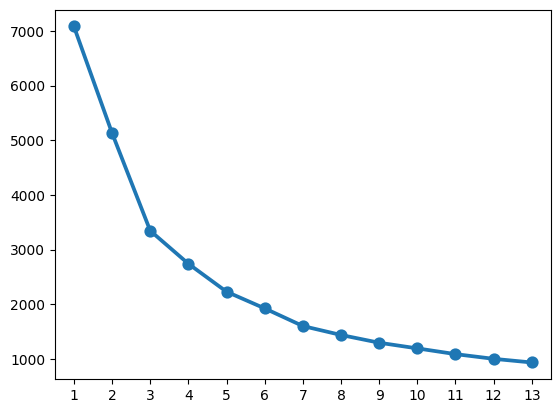

In [ ]:
# Elbow curve
sns.pointplot(x=list(range(1,14)), y=wcss)
plt.show()

In [ ]:
KM = KMeans(n_clusters=6, init='k-means++', max_iter=1000, random_state=42)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([2, 0, 2, ..., 1, 5, 1], dtype=int32)

In [ ]:
scaled_data['Clusters'] = KM.labels_
scaled_data.head()

,CustomerID,Recency,Frequency,Clusters
0,-1.699381,-0.903612,0.530212,2
1,-1.698607,2.221747,-0.231870,0
2,-1.697834,-0.805639,-0.104856,2
3,-1.696287,-0.276581,-0.181064,2
4,-1.694739,1.290998,-0.155661,0


In [ ]:
scaled_data['Clusters'].value_counts()

Clusters
2    1198
1    1195
0     426
4     369
3      42
5       3
Name: count, dtype: int64

In [ ]:
unsupervised_data['Clusters'] = KM.labels_
unsupervised_data.head()

,CustomerID,Recency,Frequency,Clusters
0,2.0,9,33,2
1,3.0,328,3,0
2,4.0,19,8,2
3,6.0,73,5,2
4,8.0,233,6,0


In [ ]:
scaled_data.to_csv('customer_clusters.csv')